In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### Reviewing Data and Data Cleaning

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/KeviiinCLH/INF2178/main/INF2178_A1_data.csv")

In [3]:
# Finding the number of rows and colums of the dataframe
df.shape

(50944, 14)

In [4]:
# Quick view of dataframe content
df.head()

,OCCUPANCY_DATE,ORGANIZATION_NAME,PROGRAM_ID,PROGRAM_NAME,SECTOR,PROGRAM_MODEL,OVERNIGHT_SERVICE_TYPE,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
0,2021-01-01,COSTI Immigrant Services,15371,COSTI North York West Hotel - Family Program,Families,Emergency,Motel/Hotel Shelter,COVID-19 Response,74,Room Based Capacity,NaN,NaN,29.0,26.0
1,2021-01-01,COSTI Immigrant Services,16211,COSTI North York West Hotel - Seniors Program,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,3,Room Based Capacity,NaN,NaN,3.0,3.0
2,2021-01-01,COSTI Immigrant Services,16192,COSTI North York West Hotel Program - Men,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,24,Room Based Capacity,NaN,NaN,28.0,23.0
3,2021-01-01,COSTI Immigrant Services,16191,COSTI North York West Hotel Program - Mixed Adult,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,25,Room Based Capacity,NaN,NaN,17.0,17.0
4,2021-01-01,COSTI Immigrant Services,16193,COSTI North York West Hotel Program - Women,Women,Emergency,Motel/Hotel Shelter,COVID-19 Response,13,Room Based Capacity,NaN,NaN,14.0,13.0


In [5]:
# Drop some columns like ORGANIZATION_NAME, PROGRAM_ID, etc., that are not helpful to the analysis
df = df.drop(df.columns[1:4],axis =1)

In [6]:
# Check for null value and data type
df.info(), df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50944 entries, 0 to 50943
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   OCCUPANCY_DATE          50944 non-null  object 
 1   SECTOR                  50944 non-null  object 
 2   PROGRAM_MODEL           50942 non-null  object 
 3   OVERNIGHT_SERVICE_TYPE  50942 non-null  object 
 4   PROGRAM_AREA            50942 non-null  object 
 5   SERVICE_USER_COUNT      50944 non-null  int64  
 6   CAPACITY_TYPE           50944 non-null  object 
 7   CAPACITY_ACTUAL_BED     32399 non-null  float64
 8   OCCUPIED_BEDS           32399 non-null  float64
 9   CAPACITY_ACTUAL_ROOM    18545 non-null  float64
 10  OCCUPIED_ROOMS          18545 non-null  float64
dtypes: float64(4), int64(1), object(6)
memory usage: 4.3+ MB


(None,
 OCCUPANCY_DATE                0
 SECTOR                        0
 PROGRAM_MODEL                 2
 OVERNIGHT_SERVICE_TYPE        2
 PROGRAM_AREA                  2
 SERVICE_USER_COUNT            0
 CAPACITY_TYPE                 0
 CAPACITY_ACTUAL_BED       18545
 OCCUPIED_BEDS             18545
 CAPACITY_ACTUAL_ROOM      32399
 OCCUPIED_ROOMS            32399
 dtype: int64)

In [7]:
# Drop the rows contain null value in PROGRAM_MODEL, OVERNIGHT_SERVICE_TYPE, PROGRAM_AREA
df = df.dropna(subset=['PROGRAM_MODEL','OVERNIGHT_SERVICE_TYPE','PROGRAM_AREA'])
df.isnull().sum()

OCCUPANCY_DATE                0
SECTOR                        0
PROGRAM_MODEL                 0
OVERNIGHT_SERVICE_TYPE        0
PROGRAM_AREA                  0
SERVICE_USER_COUNT            0
CAPACITY_TYPE                 0
CAPACITY_ACTUAL_BED       18545
OCCUPIED_BEDS             18545
CAPACITY_ACTUAL_ROOM      32397
OCCUPIED_ROOMS            32397
dtype: int64

In [8]:
df

,OCCUPANCY_DATE,SECTOR,PROGRAM_MODEL,OVERNIGHT_SERVICE_TYPE,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
0,2021-01-01,Families,Emergency,Motel/Hotel Shelter,COVID-19 Response,74,Room Based Capacity,NaN,NaN,29.0,26.0
1,2021-01-01,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,3,Room Based Capacity,NaN,NaN,3.0,3.0
2,2021-01-01,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,24,Room Based Capacity,NaN,NaN,28.0,23.0
3,2021-01-01,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,25,Room Based Capacity,NaN,NaN,17.0,17.0
4,2021-01-01,Women,Emergency,Motel/Hotel Shelter,COVID-19 Response,13,Room Based Capacity,NaN,NaN,14.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...
50939,2021-12-31,Youth,Emergency,Shelter,Base Shelter and Overnight Services System,6,Bed Based Capacity,20.0,6.0,NaN,NaN
50940,2021-12-31,Youth,Emergency,Shelter,Base Shelter and Overnight Services System,23,Bed Based Capacity,23.0,23.0,NaN,NaN
50941,2021-12-31,Youth,Transitional,Shelter,Base Shelter and Overnight Services System,13,Bed Based Capacity,14.0,13.0,NaN,NaN
50942,2021-12-31,Mixed Adult,Emergency,Shelter,Base Shelter and Overnight Services System,10,Bed Based Capacity,10.0,10.0,NaN,NaN


### Data Visualization

In [9]:
df['SECTOR'].unique()

array(['Families', 'Mixed Adult', 'Men', 'Women', 'Youth'], dtype=object)

In [10]:
# Filter data for 'Families' and 'Individual' sectors, and get descriptive statistics
families_data = df[df['SECTOR'] == 'Families']['SERVICE_USER_COUNT']
individual_data = df[df['SECTOR'].isin(['Men', 'Women', 'Mixed Adult','Youth'])]['SERVICE_USER_COUNT']
families_stats = families_data.describe()
individual_stats = individual_data.describe()
print("Descriptive Statistics for Families Sector:")
print(families_stats)
print("\nDescriptive Statistics for Individuals Sector:")
print(individual_stats)

Descriptive Statistics for Families Sector:
count    5649.000000
mean       79.651974
std        76.734511
min         1.000000
25%        10.000000
50%        57.000000
75%       124.000000
max       339.000000
Name: SERVICE_USER_COUNT, dtype: float64

Descriptive Statistics for Individuals Sector:
count    45293.000000
mean        41.497538
std         47.986584
min          1.000000
25%         15.000000
50%         27.000000
75%         48.000000
max        306.000000
Name: SERVICE_USER_COUNT, dtype: float64


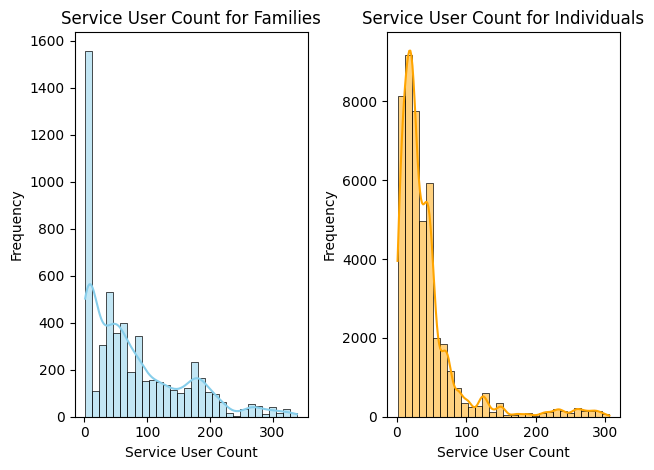

In [11]:
# Histogram for Families Sector
plt.subplot(1, 2, 1)
sns.histplot(families_data, bins=30, kde=True, color='skyblue')
plt.title('Service User Count for Families')
plt.xlabel('Service User Count')
plt.ylabel('Frequency')

# Histogram for Individuals Sector
plt.subplot(1, 2, 2)
sns.histplot(individual_data, bins=30, kde=True, color='orange')
plt.title('Service User Count for Individuals')
plt.xlabel('Service User Count')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [12]:
# Check PROGRAM_MODEL's data type and unique values
df['PROGRAM_MODEL'].unique()

array(['Emergency', 'Transitional'], dtype=object)

In [13]:
# Prepare the data by filtering for 'Emergency' and 'Transitional' program models
emergency_data = df[df['PROGRAM_MODEL'] == 'Emergency']['SERVICE_USER_COUNT']
transitional_data = df[df['PROGRAM_MODEL'] == 'Transitional']['SERVICE_USER_COUNT']
emergency_stats = emergency_data.describe()
transitional_stats = transitional_data.describe()
print("Descriptive Statistics for Emergency Model:")
print(emergency_stats)
print("\nDescriptive Statistics for Transitional Model:")
print(transitional_stats)

Descriptive Statistics for Emergency Model:
count    41541.000000
mean        49.064226
std         55.916561
min          1.000000
25%         16.000000
50%         33.000000
75%         53.000000
max        339.000000
Name: SERVICE_USER_COUNT, dtype: float64

Descriptive Statistics for Transitional Model:
count    9401.000000
mean       30.988725
std        36.431741
min         1.000000
25%        12.000000
50%        23.000000
75%        33.000000
max       221.000000
Name: SERVICE_USER_COUNT, dtype: float64


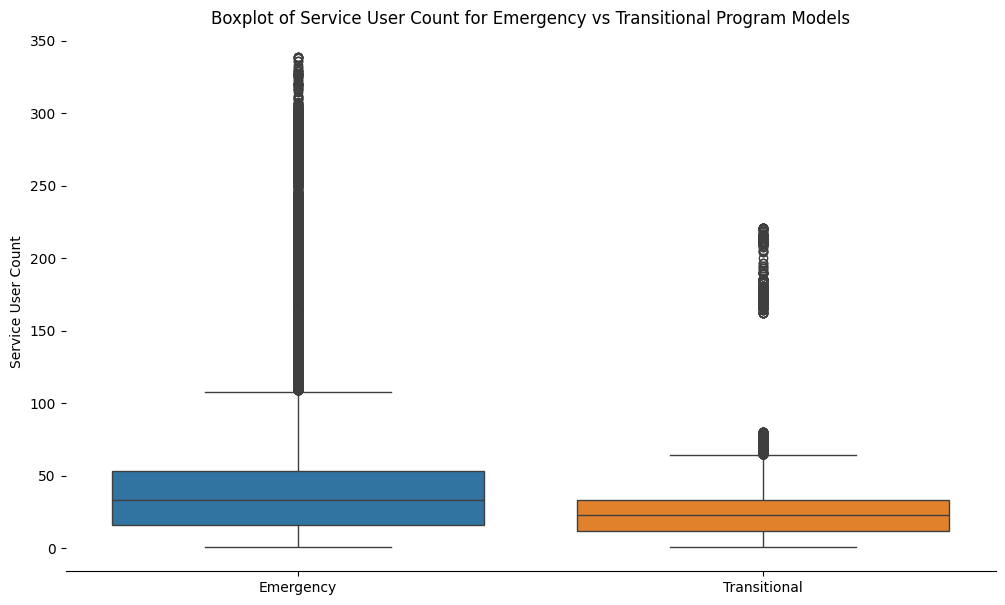

In [14]:
# Combine the data into a single DataFrame for plotting
data_to_plot = pd.DataFrame({'Emergency': emergency_data, 'Transitional': transitional_data})

fig, ax = plt.subplots(figsize=(12, 7))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

sns.boxplot(data=data_to_plot)
plt.title('Boxplot of Service User Count for Emergency vs Transitional Program Models')
plt.ylabel('Service User Count')

plt.show()

In [25]:
# Show statistical description of SERVICE_USER_COUNT
service_user_count_stats = df['SERVICE_USER_COUNT'].describe()
service_user_count_stats

count    50942.000000
mean        45.728515
std         53.326660
min          1.000000
25%         15.000000
50%         28.000000
75%         51.000000
max        339.000000
Name: SERVICE_USER_COUNT, dtype: float64

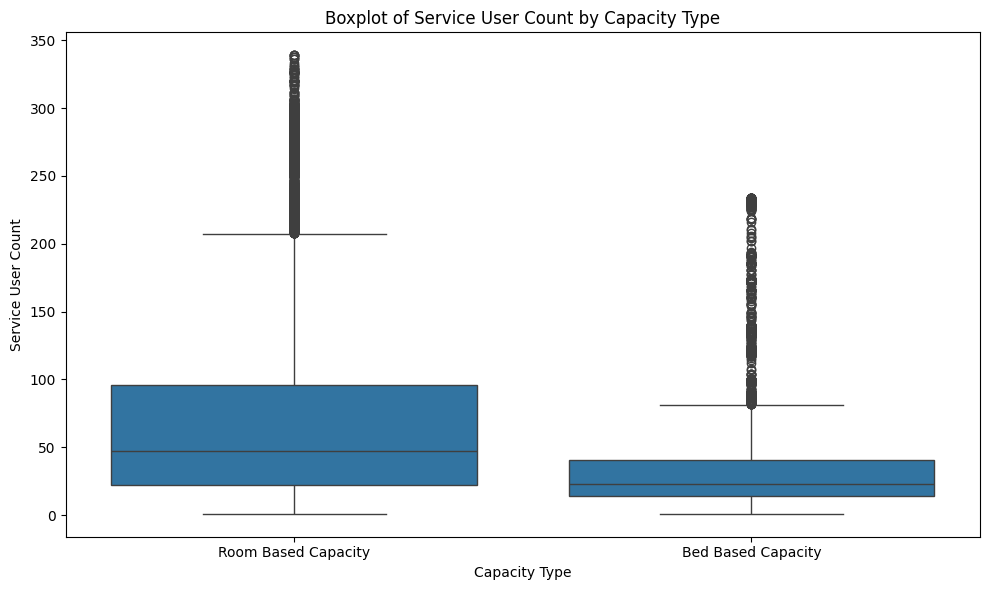

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='CAPACITY_TYPE', y='SERVICE_USER_COUNT', data=df)

plt.title('Boxplot of Service User Count by Capacity Type')
plt.xlabel('Capacity Type')
plt.ylabel('Service User Count')
plt.tight_layout()

plt.show()

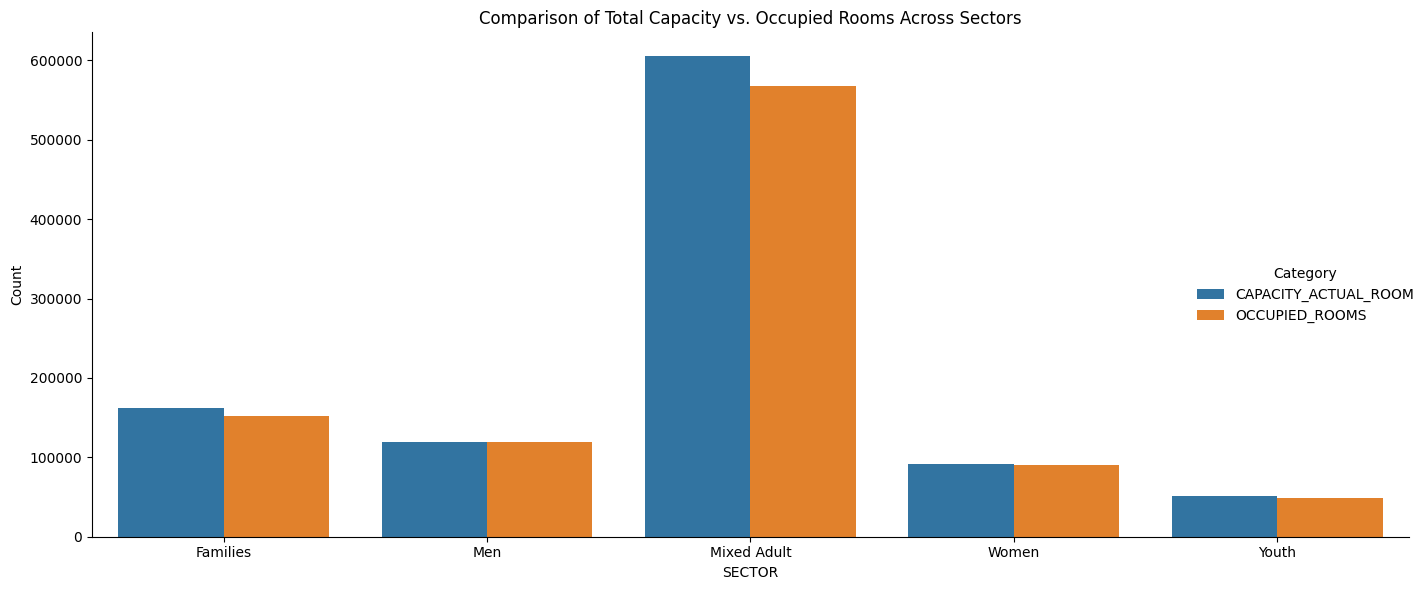

In [16]:
# Since room-based capacity and occupied have less non value than bed-based, I decided to only study the relationship between room-based and sector
# Clean the missing values in both CAPACITY_ACTUAL_ROOM and OCCUPIED_ROOMS columns
df_filled = df.fillna({'CAPACITY_ACTUAL_ROOM': 0, 'OCCUPIED_ROOMS': 0})
sector_aggregated = df_filled.groupby('SECTOR')[['CAPACITY_ACTUAL_ROOM', 'OCCUPIED_ROOMS']].sum().reset_index()

# Prepare the data for plotting
room_based_df = sector_aggregated.melt(id_vars="SECTOR", var_name="Category", value_name="Count")


catplot = sns.catplot(x="SECTOR", y="Count", hue="Category", data=room_based_df, kind="bar", height=6, aspect=2)

plt.title('Comparison of Total Capacity vs. Occupied Rooms Across Sectors')
plt.tight_layout()

plt.show()

### Conducting T-test

H0: There is no significant difference in the mean service user count between family shelters and shelters for individuals.

H1: There is a significant difference in the mean service user count between family shelters and shelters for individuals.

In [33]:
# Perform Welch's t-test
t_test_results = stats.ttest_ind(families_data, individual_data, equal_var=False)
t_test_results


TtestResult(statistic=36.49210323706514, pvalue=2.463459460539699e-264, df=6210.558424172581)

H0: There is no significant difference in the mean service user count between room based capacity and bed based capacity.

H1: There is a significant difference in the mean service user count between room based capacity and bed based capacity.

In [34]:

# Extract SERVICE_USER_COUNT for both capacity types
room_based_counts = df[df['CAPACITY_TYPE'] == 'Room Based Capacity']['SERVICE_USER_COUNT']
bed_based_counts = df[df['CAPACITY_TYPE'] == 'Bed Based Capacity']['SERVICE_USER_COUNT']

t_test_results = stats.ttest_ind(room_based_counts, bed_based_counts, equal_var=False)
t_test_results


TtestResult(statistic=78.50641490763628, pvalue=0.0, df=21327.103007947517)

H0: There is no significant difference in the mean service user count between the emegency and transitional program models.

H1: There is a significant difference in the mean service user count between the emegency and transitional program models.

In [35]:
# Performing the two-sample t-test
t_test_results_emergency_transitional = stats.ttest_ind(emergency_data, transitional_data, equal_var=False)

# The results will include the t-statistic and the p-value
t_test_results_emergency_transitional


TtestResult(statistic=38.85174699254652, pvalue=0.0, df=20758.984667611778)